In [4]:
#Importing req libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

#Importing keras libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.optimizers import Adam, SGD


Here we have imported the necessary libraries for building a `Simple Neural Network` . We have used the `Keras` library for building the neural network. We have used the `Sequential` model from Keras. The Sequential model is a linear stack of layers. We will be using the `Dense layer` which is a fully connected layer,`Adam optimizer` for optimization. We will use the `mean squared error` as the loss function, `ReLU` activation function for the hidden layers and the `sigmoid` activation function for the output layer. We will be using the `train_test_split` function from the sklearn library to split the dataset into training and testing sets, `matplotlib` library for plotting the graphs.

In [17]:
np.random.seed(0)

#loading dataset 
iris = load_iris()
breast_cancer = load_breast_cancer()

Text(0.5, 0, 'mean perimeter')

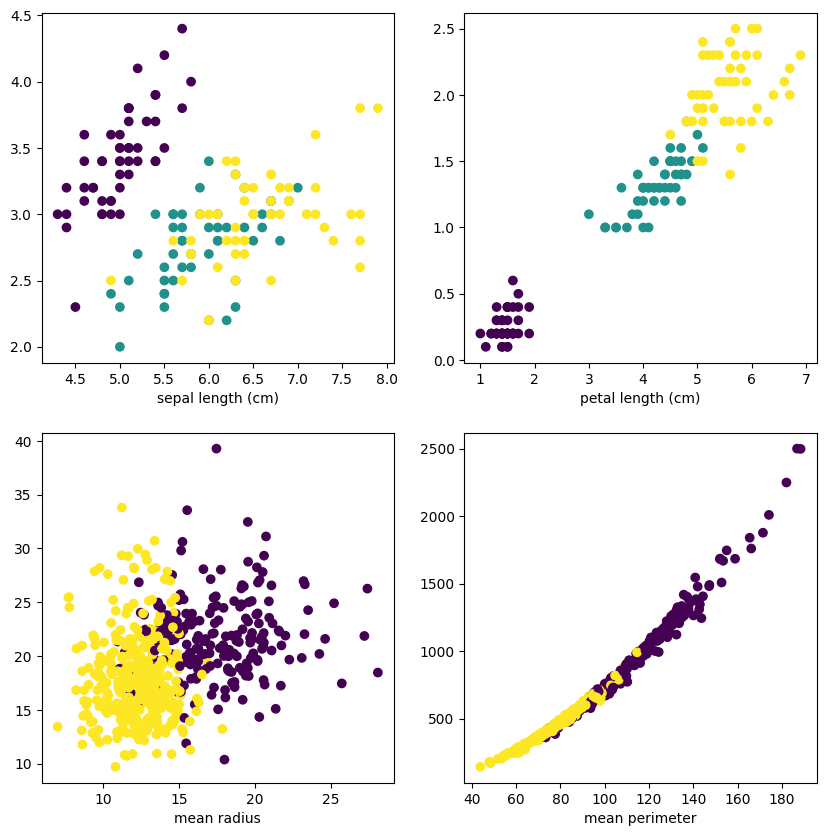

In [6]:
#plotting the random data
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1) #plt.subplot(height, width, where to plot)
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
plt.xlabel(iris.feature_names[0])
#scatter plot of 2nd and 3rd feature

plt.subplot(2, 2, 2)
plt.scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target)
plt.xlabel(iris.feature_names[2])

plt.subplot(2, 2, 3)
plt.scatter(breast_cancer.data[:, 0], breast_cancer.data[:, 1], c=breast_cancer.target)
plt.xlabel(breast_cancer.feature_names[0])

plt.subplot(2, 2, 4)
plt.scatter(breast_cancer.data[:, 2], breast_cancer.data[:, 3], c=breast_cancer.target)
plt.xlabel(breast_cancer.feature_names[2])

In [7]:
#splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2) #test_size=0.2 means 20% of data is used for testing and 80% for training 

Next up we will be defining the model , which is Sequential in this case and adding the layers to the model. We will be adding 3 layers to the model. The first layer will have 8 neurons and the input shape will be 4(As there are 4 features(values) in a single X_train array . The second layer will have 8 neurons and the third layer will have 3 (as there are 3 classes) neuron. We will be using the `ReLU` activation function for the hidden layers and the `softmax` activation function for the output layer. We will be using the `Adam` optimizer for optimization and the `mean squared error` as the loss function.

In [8]:
#building the model
model = Sequential(
    [Dense(8, input_shape=(4,), activation='relu'), #input_shape=(4,) means 4 features
    Dense(4, input_shape=(4,), activation='relu'), #input_shape=(4,) means 4 features
    Dense(3, activation='softmax') #output layer
    ]
)
#compiling the model
model.compile(optimizer=Adam(lr=0.04), loss='mean_squared_error', metrics=['accuracy']) #lr=learning rate, loss=loss function, metrics=accuracy

2023-06-05 20:37:00.045990: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-06-05 20:37:00.046083: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: kalyan-linux
2023-06-05 20:37:00.046101: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: kalyan-linux
2023-06-05 20:37:00.046367: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 530.41.3
2023-06-05 20:37:00.046422: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 530.41.3
2023-06-05 20:37:00.046438: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 530.41.3
/home/kalyan/.local/lib/python3.10/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learnin

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 3)                 15        
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


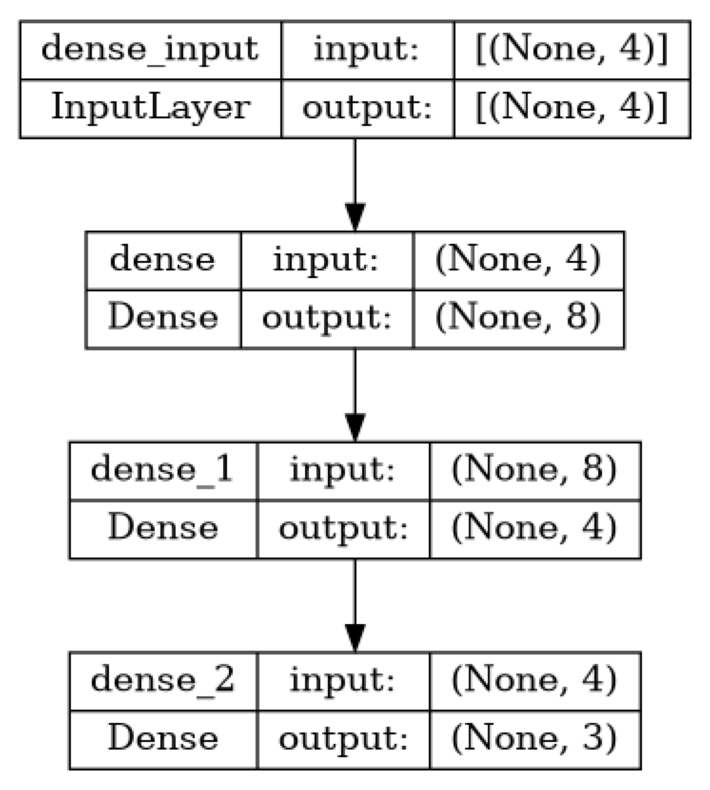

In [10]:
#plotting the model 
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
plt.figure(figsize=(10, 10))
plt.imshow(plt.imread('model.png'))
plt.axis('off')
plt.show()

epochs=100 means 100 iterations, to_categorical() converts the target into one hot encoding as we have 3 classes we need numerical values for each class
We are also using Tensorboard to visualize the training process.

In [11]:
#training the model
from keras.callbacks import TensorBoard
model.fit(X_train, to_categorical(y_train), epochs=100, callbacks=[TensorBoard('Iris_logs')]) 

#Start a Tensorboard session by pasting this in the terminal: tensorboard --logdir logs/ 

Epoch 1/100
4/4 [==============================] - 1s 6ms/step - loss: 0.2764 - accuracy: 0.4250
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.2173 - accuracy: 0.4000
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 0.1722 - accuracy: 0.5750
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 0.1332 - accuracy: 0.8000
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 0.1068 - accuracy: 0.9500
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0971 - accuracy: 0.7250
Epoch 7/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0808 - accuracy: 0.9667
Epoch 8/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0708 - accuracy: 0.9667
Epoch 9/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0575 - accuracy: 0.9417
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0452 - accuracy: 0.9500
Epoch 11/100
4/4 [===========

Text(0.5, 0, 'Epochs')

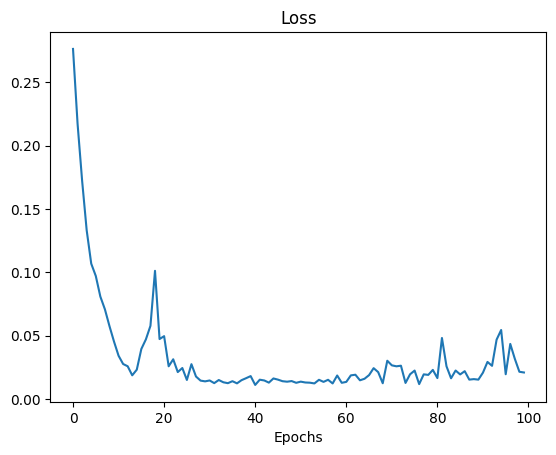

In [12]:
#plotting the loss and accuracy
plt.plot(model.history.history['loss'])
plt.title('Loss')
plt.xlabel('Epochs')

Text(0.5, 0, 'Epochs')

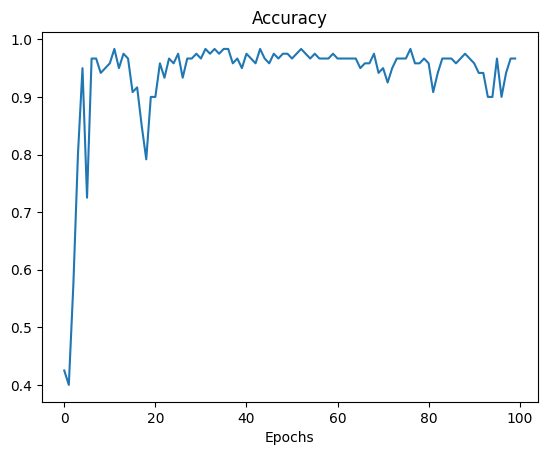

In [13]:
#plotting the accuracy
plt.plot(model.history.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')

In [14]:
#evaluating the model
model.evaluate(X_test, to_categorical(y_test))

1/1 [==============================] - 0s 195ms/step - loss: 0.0263 - accuracy: 0.9333


[0.026348957791924477, 0.9333333373069763]

In [21]:
#using breast Cancer dataset
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.2) #test_size=0.2 means 20% of data is used for testing and 80% for training 

#building the model
model1 = Sequential([
    Dense(8, input_shape=(30,), activation='relu'),
    Dense(8, input_shape=(30,), activation='relu'),
    Dense(2, activation='softmax')
])
model1.compile(optimizer=Adam(lr=0.04), loss='binary_crossentropy', metrics=['accuracy']) #lr=learning rate, loss=loss function, metrics=accuracy
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 8)                 248       
                                                                 
 dense_10 (Dense)            (None, 8)                 72        
                                                                 
 dense_11 (Dense)            (None, 2)                 18        
                                                                 
Total params: 338
Trainable params: 338
Non-trainable params: 0
_________________________________________________________________


/home/kalyan/.local/lib/python3.10/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [22]:
#training the model
from keras.callbacks import TensorBoard
model1.fit(X_train, to_categorical(y_train), epochs=100, callbacks=[TensorBoard('Cancer_logs')])

Epoch 1/100
15/15 [==============================] - 1s 3ms/step - loss: 21.6600 - accuracy: 0.5165
Epoch 2/100
15/15 [==============================] - 0s 8ms/step - loss: 2.2149 - accuracy: 0.5824
Epoch 3/100
15/15 [==============================] - 0s 3ms/step - loss: 1.2899 - accuracy: 0.7275
Epoch 4/100
15/15 [==============================] - 0s 3ms/step - loss: 0.5550 - accuracy: 0.8132
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3424 - accuracy: 0.8813
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3429 - accuracy: 0.8725
Epoch 7/100
15/15 [==============================] - 0s 3ms/step - loss: 0.2784 - accuracy: 0.9077
Epoch 8/100
15/15 [==============================] - 0s 4ms/step - loss: 0.2237 - accuracy: 0.9077
Epoch 9/100
15/15 [==============================] - 0s 4ms/step - loss: 0.2571 - accuracy: 0.9033
Epoch 10/100
15/15 [==============================] - 0s 3ms/step - loss: 0.2216 - accuracy: 0.9099
Epoch 11

In [24]:
#evaluating the model
model1.evaluate(X_test, to_categorical(y_test))

4/4 [==============================] - 0s 3ms/step - loss: 0.2840 - accuracy: 0.9035


[0.28399965167045593, 0.9035087823867798]

Text(0.5, 0, 'Epochs')

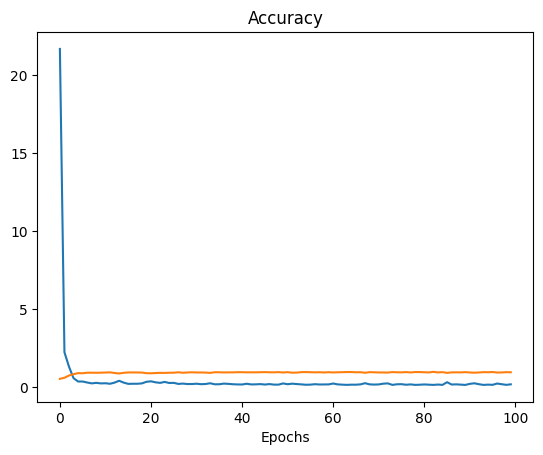

In [23]:
#plotting the loss and accuracy
plt.plot(model1.history.history['loss'])
plt.title('Loss')
plt.xlabel('Epochs')

#plotting the accuracy
plt.plot(model1.history.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
